In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#import CSV files to view data
import pandas as pd 
atrisk_state_df = pd.read_csv("capstone_project-bill-working-files/covid_atrisk_by_state.csv")
pop_dstr_df = pd.read_csv("capstone_project-bill-working-files/population_distribution.csv")
cases_state_df = pd.read_csv("capstone_project-bill-working-files/covid_cases_state_summary_TP.csv")
deaths_state_df = pd.read_csv("capstone_project-bill-working-files/covid_death_daily_rate_by_state_TP.csv")
comb_cases_deaths_df = pd.read_csv("capstone_project-bill-working-files/combined_cases_deaths_state.csv")
state_covidstats_df = pd.read_csv ("capstone_project-bill-working-files/Covid_summary_stats_by_state.csv")

In [3]:
# Change location to state for merge later on
atrisk_state_df = atrisk_state_df.rename(columns={"Location":"State"})
atrisk_state_df.head(5)

,State,Adults_over_18,at_risk,percent_at_risk,under_65,health_risk,percent_at_risk.1,over_65,percent_over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
0,United States,246402480,92560223,0.376,195281293,41439036,0.212,51121187,0.552,0.093,0.075,0.121,0.021,0.035,0.050,0.066,0.13
1,Alabama,3684158,1588905,0.431,2873170,777917,0.271,810988,0.510,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16
2,Alaska,527792,172913,0.328,442335,87456,0.198,85457,0.494,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17
3,Arizona,5389431,2107495,0.391,4143554,861618,0.208,1245877,0.591,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13
4,Arkansas,2231289,971477,0.435,1742217,482405,0.277,489072,0.503,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19


In [4]:
pop_dstr_df.head(5)

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,over_65
0,United States,0.236,0.087,0.125,0.255,0.132,0.165
1,Alabama,0.237,0.087,0.115,0.251,0.135,0.175
2,Alaska,0.259,0.093,0.139,0.246,0.132,0.130
3,Arizona,0.240,0.093,0.121,0.241,0.124,0.182
4,Arkansas,0.247,0.087,0.115,0.248,0.131,0.173


In [5]:
cases_state_df.head(5)

,Unnamed: 0,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1/22/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1/26/2020,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
deaths_state_df.head(5)

,Unnamed: 0,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population,4903185,740995,55641,7278717,3017804,39512223,5758736,3565287,973764,...,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759
1,1/22/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/23/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/24/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/25/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
comb_cases_deaths_df.head(5)

,County,State,Population,Total_cases,Total_deaths
0,Autauga,Alabama,55869,9780,142
1,Baldwin,Alabama,223234,36579,518
2,Barbour,Alabama,24686,3519,71
3,Bibb,Alabama,22394,4157,83
4,Blount,Alabama,57826,9870,162


In [8]:
state_covidstats_df.head(5)

,State,population,total_cases,total_deaths,case_rate,death_rate,deaths_per_case
0,Alabama,4903185,800692,14470,0.163300,0.002951,0.018072
1,Alaska,740995,115703,578,0.156145,0.000780,0.004996
2,Arizona,7278717,1102422,20137,0.151458,0.002767,0.018266
3,Arkansas,3017804,498062,7740,0.165041,0.002565,0.015540
4,California,39512223,4732419,69256,0.119771,0.001753,0.014634


In [9]:
# make new df to merge state_covidstats_df and atrisk_state_df
comb_stats_atrisk_df = pd.merge(state_covidstats_df,atrisk_state_df, on= "State", how= "outer")
comb_stats_atrisk_df.head(5)

,State,population,total_cases,total_deaths,case_rate,death_rate,deaths_per_case,Adults_over_18,at_risk,percent_at_risk,...,over_65,percent_over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
0,Alabama,4903185.0,800692.0,14470.0,0.163300,0.002951,0.018072,3684158.0,1588905.0,0.431,...,810988.0,0.510,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16
1,Alaska,740995.0,115703.0,578.0,0.156145,0.000780,0.004996,527792.0,172913.0,0.328,...,85457.0,0.494,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17
2,Arizona,7278717.0,1102422.0,20137.0,0.151458,0.002767,0.018266,5389431.0,2107495.0,0.391,...,1245877.0,0.591,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13
3,Arkansas,3017804.0,498062.0,7740.0,0.165041,0.002565,0.015540,2231289.0,971477.0,0.435,...,489072.0,0.503,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19
4,California,39512223.0,4732419.0,69256.0,0.119771,0.001753,0.014634,29879585.0,9952647.0,0.333,...,5576637.0,0.560,0.095,0.057,0.099,0.032,0.032,0.039,0.044,0.08


In [10]:
# check for NaN values
comb_stats_atrisk_df.isna().sum()

State                0
population           2
total_cases          2
total_deaths         2
case_rate            2
death_rate           2
deaths_per_case      2
Adults_over_18       1
at_risk              1
percent_at_risk      1
under_65             1
health_risk          1
percent_at_risk.1    1
over_65              1
percent_over_65      1
asthma               1
cardovascular        1
diabetes             1
pre_diabetes         1
kidney               1
obesity              1
respiratory          2
smokers              1
dtype: int64

In [11]:
#drop unecessary columns 
comb_stats_atrisk_df = comb_stats_atrisk_df.drop(columns = ["deaths_per_case", "percent_at_risk", "percent_over_65", "percent_at_risk.1"], axis=1)
comb_stats_atrisk_df

,State,population,total_cases,total_deaths,case_rate,death_rate,Adults_over_18,at_risk,under_65,health_risk,over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
0,Alabama,4903185.0,800692.0,14470.0,0.163300,0.002951,3684158.0,1588905.0,2873170.0,777917.0,810988.0,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16
1,Alaska,740995.0,115703.0,578.0,0.156145,0.000780,527792.0,172913.0,442335.0,87456.0,85457.0,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17
2,Arizona,7278717.0,1102422.0,20137.0,0.151458,0.002767,5389431.0,2107495.0,4143554.0,861618.0,1245877.0,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13
3,Arkansas,3017804.0,498062.0,7740.0,0.165041,0.002565,2231289.0,971477.0,1742217.0,482405.0,489072.0,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19
4,California,39512223.0,4732419.0,69256.0,0.119771,0.001753,29879585.0,9952647.0,24302948.0,4376010.0,5576637.0,0.095,0.057,0.099,0.032,0.032,0.039,0.044,0.08
5,Colorado,5758736.0,673517.0,7594.0,0.116956,0.001319,4301492.0,1345398.0,3506700.0,550606.0,794792.0,0.096,0.056,0.088,0.023,0.027,0.032,0.045,0.12
6,Connecticut,3565287.0,391066.0,8650.0,0.109687,0.002426,2739381.0,985861.0,2148446.0,394926.0,590935.0,0.106,0.069,0.108,0.017,0.025,0.042,0.052,0.11
7,Delaware,973764.0,134619.0,1972.0,0.138246,0.002025,739951.0,305395.0,562058.0,127502.0,177893.0,0.103,0.083,0.139,0.017,0.041,0.062,0.085,0.14
8,District of Columbia,705749.0,61331.0,1176.0,0.086902,0.001666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,21477737.0,3620106.0,55299.0,0.168552,0.002575,16683102.0,7018513.0,12389357.0,2724768.0,4293745.0,0.074,0.090,0.130,0.022,0.044,0.039,0.077,0.13


In [12]:
#drop NaN values
comb_stats_atrisk_df = comb_stats_atrisk_df.dropna()
comb_stats_atrisk_df

,State,population,total_cases,total_deaths,case_rate,death_rate,Adults_over_18,at_risk,under_65,health_risk,over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
0,Alabama,4903185.0,800692.0,14470.0,0.163300,0.002951,3684158.0,1588905.0,2873170.0,777917.0,810988.0,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16
1,Alaska,740995.0,115703.0,578.0,0.156145,0.000780,527792.0,172913.0,442335.0,87456.0,85457.0,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17
2,Arizona,7278717.0,1102422.0,20137.0,0.151458,0.002767,5389431.0,2107495.0,4143554.0,861618.0,1245877.0,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13
3,Arkansas,3017804.0,498062.0,7740.0,0.165041,0.002565,2231289.0,971477.0,1742217.0,482405.0,489072.0,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19
4,California,39512223.0,4732419.0,69256.0,0.119771,0.001753,29879585.0,9952647.0,24302948.0,4376010.0,5576637.0,0.095,0.057,0.099,0.032,0.032,0.039,0.044,0.08
5,Colorado,5758736.0,673517.0,7594.0,0.116956,0.001319,4301492.0,1345398.0,3506700.0,550606.0,794792.0,0.096,0.056,0.088,0.023,0.027,0.032,0.045,0.12
6,Connecticut,3565287.0,391066.0,8650.0,0.109687,0.002426,2739381.0,985861.0,2148446.0,394926.0,590935.0,0.106,0.069,0.108,0.017,0.025,0.042,0.052,0.11
7,Delaware,973764.0,134619.0,1972.0,0.138246,0.002025,739951.0,305395.0,562058.0,127502.0,177893.0,0.103,0.083,0.139,0.017,0.041,0.062,0.085,0.14
9,Florida,21477737.0,3620106.0,55299.0,0.168552,0.002575,16683102.0,7018513.0,12389357.0,2724768.0,4293745.0,0.074,0.090,0.130,0.022,0.044,0.039,0.077,0.13
10,Georgia,10617423.0,1582063.0,26242.0,0.149006,0.002472,7748091.0,2803400.0,6321701.0,1377010.0,1426390.0,0.088,0.087,0.141,0.018,0.043,0.056,0.074,0.14


In [13]:
#make new df to look at risk variables and death/ case rate in corr matrix 
risk_death_case_df = comb_stats_atrisk_df.drop(columns = ["total_cases","total_deaths","Adults_over_18", "at_risk", "under_65", "health_risk"], axis=1)
risk_death_case_df = risk_death_case_df.set_index("State")
risk_death_case_df

,population,case_rate,death_rate,over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
State,,,,,,,,,,,,
Alabama,4903185.0,0.163300,0.002951,810988.0,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16
Alaska,740995.0,0.156145,0.000780,85457.0,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17
Arizona,7278717.0,0.151458,0.002767,1245877.0,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13
Arkansas,3017804.0,0.165041,0.002565,489072.0,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19
California,39512223.0,0.119771,0.001753,5576637.0,0.095,0.057,0.099,0.032,0.032,0.039,0.044,0.08
Colorado,5758736.0,0.116956,0.001319,794792.0,0.096,0.056,0.088,0.023,0.027,0.032,0.045,0.12
Connecticut,3565287.0,0.109687,0.002426,590935.0,0.106,0.069,0.108,0.017,0.025,0.042,0.052,0.11
Delaware,973764.0,0.138246,0.002025,177893.0,0.103,0.083,0.139,0.017,0.041,0.062,0.085,0.14
Florida,21477737.0,0.168552,0.002575,4293745.0,0.074,0.090,0.130,0.022,0.044,0.039,0.077,0.13


In [14]:
# try correlation matrix 
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = risk_death_case_df.corr()
print (corrMatrix)

               population  case_rate  death_rate   over_65    asthma  \
population       1.000000  -0.009782    0.192816  0.980947 -0.286727   
case_rate       -0.009782   1.000000    0.627921 -0.000963 -0.183970   
death_rate       0.192816   0.627921    1.000000  0.222414 -0.088243   
over_65          0.980947  -0.000963    0.222414  1.000000 -0.288721   
asthma          -0.286727  -0.183970   -0.088243 -0.288721  1.000000   
cardovascular   -0.164279   0.434097    0.522170 -0.117301  0.160140   
diabetes        -0.005754   0.414799    0.576639  0.009924  0.025740   
pre_diabetes     0.039092  -0.408388   -0.352643  0.041611 -0.037476   
kidney           0.039168   0.412100    0.478105  0.087977  0.063537   
obesity         -0.121986   0.384261    0.334002 -0.132374  0.105558   
respiratory     -0.153315   0.293018    0.391989 -0.107156  0.264021   
smokers         -0.314642   0.422992    0.291842 -0.292109  0.146725   

               cardovascular  diabetes  pre_diabetes    kidney 

Strongly correlated with death_rate:
cardiovascular disease : 52% 
diabetes : 57%
Kidney disease : 48%
Respiratory: 39% 

- Anything less than 0.4 is considered a weak correlation. 
Obsesity: 33%
Smokers: ~30%
Over 65: 22%
Population: 19%

*ASTHMA & PRE DIABETES  HAD NEGATIVE CORRELATION*


<AxesSubplot:xlabel='diabetes', ylabel='death_rate'>

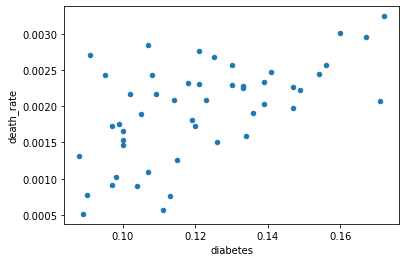

In [15]:
risk_death_case_df.plot(kind='scatter', x='diabetes', y='death_rate')


<AxesSubplot:xlabel='kidney', ylabel='death_rate'>

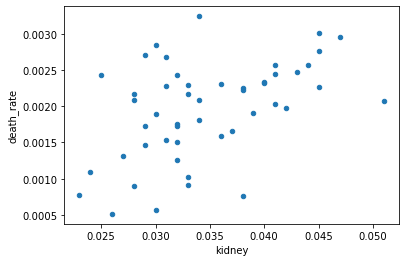

In [16]:
risk_death_case_df.plot(kind='scatter', x='kidney', y='death_rate')

<AxesSubplot:xlabel='respiratory', ylabel='death_rate'>

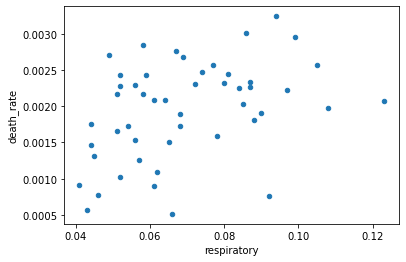

In [17]:
risk_death_case_df.plot(kind='scatter', x='respiratory', y='death_rate')

In [18]:
#important to note that the death rate (total death rate is per person)
risk_death_case_df.describe()

,population,case_rate,death_rate,over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers
count,4.900000e+01,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000
mean,6.513265e+06,0.132742,0.001952,1.012971e+06,0.096633,0.077694,0.121429,0.020735,0.034694,0.05198,0.069510,0.142449
std,7.457789e+06,0.030502,0.000670,1.109330e+06,0.011770,0.015115,0.022880,0.008822,0.006533,0.01299,0.019491,0.029967
min,5.787590e+05,0.054842,0.000514,8.545700e+04,0.074000,0.048000,0.088000,0.010000,0.023000,0.02800,0.041000,0.070000
25%,1.792147e+06,0.118041,0.001529,2.917140e+05,0.089000,0.067000,0.102000,0.017000,0.030000,0.04200,0.054000,0.130000
50%,4.467673e+06,0.138246,0.002080,7.110640e+05,0.096000,0.075000,0.119000,0.018000,0.033000,0.05000,0.066000,0.140000
75%,7.278717e+06,0.156145,0.002425,1.142771e+06,0.103000,0.087000,0.136000,0.023000,0.040000,0.06300,0.085000,0.160000
max,3.951222e+07,0.180376,0.003241,5.576637e+06,0.125000,0.118000,0.172000,0.070000,0.051000,0.08100,0.123000,0.220000


CUT OFF VALUES FOR DEATH RATE:

LOW: <= 0.001529
MEDIUM: >0.001529 & >0.002425 (inner Q ranges)
HIGH: >=0.002425


In [19]:
# write a for loop and create new column for risk 
risk = []
for value in risk_death_case_df["death_rate"]:
    if value <= 0.001529:
        risk.append("LOW")
    elif value >0.001529 and value <0.002425:
        risk.append("MODERATE")
    else: 
        risk.append("HIGH")
risk_death_case_df["risk"] = risk
risk_death_case_df

,population,case_rate,death_rate,over_65,asthma,cardovascular,diabetes,pre_diabetes,kidney,obesity,respiratory,smokers,risk
State,,,,,,,,,,,,,
Alabama,4903185.0,0.163300,0.002951,810988.0,0.089,0.101,0.167,0.018,0.047,0.067,0.099,0.16,HIGH
Alaska,740995.0,0.156145,0.000780,85457.0,0.091,0.061,0.090,0.029,0.023,0.048,0.046,0.17,LOW
Arizona,7278717.0,0.151458,0.002767,1245877.0,0.101,0.075,0.121,0.025,0.045,0.045,0.067,0.13,HIGH
Arkansas,3017804.0,0.165041,0.002565,489072.0,0.094,0.116,0.156,0.012,0.041,0.063,0.105,0.19,HIGH
California,39512223.0,0.119771,0.001753,5576637.0,0.095,0.057,0.099,0.032,0.032,0.039,0.044,0.08,MODERATE
Colorado,5758736.0,0.116956,0.001319,794792.0,0.096,0.056,0.088,0.023,0.027,0.032,0.045,0.12,LOW
Connecticut,3565287.0,0.109687,0.002426,590935.0,0.106,0.069,0.108,0.017,0.025,0.042,0.052,0.11,HIGH
Delaware,973764.0,0.138246,0.002025,177893.0,0.103,0.083,0.139,0.017,0.041,0.062,0.085,0.14,MODERATE
Florida,21477737.0,0.168552,0.002575,4293745.0,0.074,0.090,0.130,0.022,0.044,0.039,0.077,0.13,HIGH


** Should I make the risk variables also categorical to display below average, average, and above average??**

In [34]:
# new df to drop case rate and focus on death rate and keep high correlation features only 
death_bystate_stats = risk_death_case_df.drop(columns=["case_rate", "population", "over_65", "asthma", "cardovascular", "pre_diabetes", "obesity", "smokers"], axis=1)
death_bystate_stats.head(5)

,death_rate,diabetes,kidney,respiratory,risk
State,,,,,
Alabama,0.002951,0.167,0.047,0.099,HIGH
Alaska,0.000780,0.090,0.023,0.046,LOW
Arizona,0.002767,0.121,0.045,0.067,HIGH
Arkansas,0.002565,0.156,0.041,0.105,HIGH
California,0.001753,0.099,0.032,0.044,MODERATE


In [35]:
#use get dummies for risk collumn 
one_hot = pd.get_dummies(death_bystate_stats["risk"])
death_bystate_stats= death_bystate_stats.drop("risk", axis =1)
death_bystate_stats = death_bystate_stats.join(one_hot)
death_bystate_stats

,death_rate,diabetes,kidney,respiratory,HIGH,LOW,MODERATE
State,,,,,,,
Alabama,0.002951,0.167,0.047,0.099,1,0,0
Alaska,0.000780,0.090,0.023,0.046,0,1,0
Arizona,0.002767,0.121,0.045,0.067,1,0,0
Arkansas,0.002565,0.156,0.041,0.105,1,0,0
California,0.001753,0.099,0.032,0.044,0,0,1
Colorado,0.001319,0.088,0.027,0.045,0,1,0
Connecticut,0.002426,0.108,0.025,0.052,1,0,0
Delaware,0.002025,0.139,0.041,0.085,0,0,1
Florida,0.002575,0.130,0.044,0.077,1,0,0


In [64]:
# need to establish DAILY cutoff values! Upload new CSV with daily death percentages
daily_death_percentages = pd.read_csv("capstone_project-bill-working-files/death_rate_percentages_daily.csv")
daily_death_percentages.head(5)

,Unnamed: 0,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population,4903185.0,740995.0,55641.0,7278717.0,3017804.0,39512223.0,5758736.0,3565287.0,973764.0,...,884659.0,6829174.0,28995881.0,3205958.0,623989.0,8535519.0,7614893.0,1792147.0,5822434.0,578759.0
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#drop first row of daily_death_percentages
daily_death_percentages=daily_death_percentages.iloc[1: , :]

In [66]:
# change 1st column to date and set to index
daily_death_percentages=daily_death_percentages.rename(columns={"Unnamed: 0": "Date"})
daily_death_percentages = daily_death_percentages.set_index("Date")
daily_death_percentages = daily_death_percentages.drop(columns=["American Samoa","District of Columbia"])
daily_death_percentages

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/29/21,0.000009,0.000005,0.000005,0.000006,0.000004,0.000003,0.000001,0.000003,0.000000,0.000017,...,0.000000,0.000007,0.000014,0.000005,0.000006,0.000006,0.000008,0.000036,0.000003,0.0
9/30/21,0.000020,0.000013,0.000003,0.000007,0.000004,0.000000,0.000000,0.000001,0.000044,0.000014,...,0.000010,0.000007,0.000012,0.000004,0.000000,0.000006,0.000009,0.000016,0.000003,0.0
10/1/21,0.000019,0.000001,0.000008,0.000009,0.000002,0.000009,0.000006,0.000000,0.000014,0.000015,...,0.000002,0.000008,0.000011,0.000003,0.000002,0.000007,0.000005,0.000029,0.000002,0.0


In [73]:
#run describe to view standard deviations
daily_death_descr_df = daily_death_percentages.describe()
daily_death_descr_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,...,621.000000,621.000000,621.000000,621.000000,6.210000e+02,621.000000,621.000000,621.000000,621.000000,621.000000
mean,0.000005,0.000001,0.000004,0.000004,0.000003,0.000002,0.000004,0.000003,0.000004,0.000004,...,0.000004,0.000004,0.000004,0.000001,8.776167e-07,0.000002,0.000002,0.000003,0.000002,0.000003
std,0.000009,0.000004,0.000007,0.000006,0.000004,0.000003,0.000007,0.000006,0.000007,0.000005,...,0.000009,0.000005,0.000004,0.000002,1.607793e-06,0.000004,0.000002,0.000007,0.000004,0.000010
min,-0.000003,0.000000,-0.000001,-0.000058,-0.000009,-0.000002,-0.000001,-0.000001,0.000000,0.000000,...,0.000000,-0.000014,-0.000001,-0.000002,-2.000000e-06,-0.000011,-0.000009,-0.000089,-0.000012,-0.000007
25%,0.000000,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000001,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000002,0.000000,0.000002,0.000002,0.000002,0.000001,0.000001,0.000002,0.000003,0.000003,...,0.000000,0.000002,0.000002,0.000001,0.000000e+00,0.000001,0.000001,0.000001,0.000001,0.000000
75%,0.000005,0.000001,0.000005,0.000006,0.000003,0.000003,0.000004,0.000004,0.000005,0.000005,...,0.000003,0.000005,0.000005,0.000002,2.000000e-06,0.000003,0.000002,0.000004,0.000003,0.000000
max,0.000063,0.000059,0.000046,0.000052,0.000028,0.000046,0.000057,0.000134,0.000072,0.000045,...,0.000061,0.000033,0.000024,0.000011,1.000000e-05,0.000045,0.000023,0.000097,0.000023,0.000071
